## Exercice 2 : Introduction au Traitement du Langage Naturel (NLP)

### Installation des bibliothèques nécéssaires
- Spacy
- NLTK
- seaborn
- fr_core_news_sm
- scikit-learn 
- networkx

In [2]:
%pip install -U spacy
%pip install nltk
%pip install scikit-learn
%pip install networkx


  Using cached spacy-3.8.7-cp312-cp312-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (27 kB)
  Using cached spacy_legacy-3.0.12-py2.py3-none-any.whl.metadata (2.8 kB)
  Using cached spacy_loggers-1.0.5-py3-none-any.whl.metadata (23 kB)
  Using cached murmurhash-1.0.13-cp312-cp312-manylinux_2_5_x86_64.manylinux1_x86_64.manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (2.2 kB)
  Using cached cymem-2.0.11-cp312-cp312-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (8.5 kB)
  Using cached preshed-3.0.10-cp312-cp312-manylinux_2_5_x86_64.manylinux1_x86_64.manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (2.4 kB)
  Using cached thinc-8.3.6-cp312-cp312-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (15 kB)
  Using cached wasabi-1.1.3-py3-none-any.whl.metadata (28 kB)
  Using cached srsly-2.5.1-cp312-cp312-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (19 kB)
  Using cached catalogue-2.0.10-py3-none-any.whl.metadata (14 kB)
  Using cached wease

In [5]:
#python -m spacy download fr_core_web_sm
#%pip install fr_core_news_sm
%pip install matplotlib

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 109.7/109.7 kB 398.2 kB/s eta 0:00:001m370.5 kB/s eta 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.7/8.7 MB 1.3 MB/s eta 0:00:00m eta 0:00:010:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 362.6/362.6 kB 1.1 MB/s eta 0:00:00m eta 0:00:010:01:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.9/4.9 MB 1.2 MB/s eta 0:00:00m eta 0:00:010:00:010m
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.5/1.5 MB 839.1 kB/s eta 0:00:00m eta 0:00:0101:010m
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.6/6.6 MB 1.3 MB/s eta 0:00:00m eta 0:00:010:01:010m
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 111.1/111.1 kB 1.3 MB/s eta 0:00:0031m1.8 MB/s eta 0:00:01
Note: you may need to restart the kernel to use updated packages.


In [2]:
%pip install seaborn

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 294.9/294.9 kB 168.1 kB/s eta 0:00:001m165.2 kB/s eta 0:00:01
Note: you may need to restart the kernel to use updated packages.


In [1]:
# Importations des bibliothèques
import pandas as pd
import spacy
import nltk
from nltk.tokenize import word_tokenize, sent_tokenize
from nltk.corpus import stopwords
from nltk.tag import pos_tag
from matplotlib import pyplot as plt
import seaborn as sns
from collections import Counter
import os


In [2]:
# Téléchargement des ressources NLTK
try:
    nltk.download('punkt')
    nltk.download('stopwords')
    nltk.download('averaged_perceptron_tagger')
    nltk.download('punkt_tab')
except Exception as e:
    print(f"Erreur lors du téléchargement des ressources NLTK: {e}")


[nltk_data] Downloading package punkt to /home/good-boy/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /home/good-
[nltk_data]     boy/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /home/good-boy/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package punkt_tab to /home/good-
[nltk_data]     boy/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.


In [3]:
# Telechargement du modèle français de spaCy
nlp = spacy.load("fr_core_news_sm")
# Telechargement du modèle anglais de spaCy
# nlp = spacy.load("en_core_web_sm")

Modèle spaCy français chargé avec succès
Dataset fusionné créé avec 400 articles
=== Comparaison de la tokenisation ===

Texte 1: Burkina : le partenariat public-privé se renforce pour accélérer les projets structurants...
spaCy tokens (15): ['Burkina', '\xa0', ':', 'le', 'partenariat', 'public', '-', 'privé', 'se', 'renforce']
NLTK tokens (12): ['Burkina', ':', 'le', 'partenariat', 'public-privé', 'se', 'renforce', 'pour', 'accélérer', 'les']
--------------------------------------------------------------------------------
Texte 2: Burkina/ Évaluation des ministres : 54 %, la moyenne globale après trois jours de bilan...
spaCy tokens (18): ['Burkina/', 'Évaluation', 'des', 'ministres', '\xa0', ':', '54', '\xa0', '%', ',']
NLTK tokens (16): ['Burkina/', 'Évaluation', 'des', 'ministres', ':', '54', '%', ',', 'la', 'moyenne']
--------------------------------------------------------------------------------
Texte 3: Burkina/Évaluation des ministres : Jacques Sosthène Dingara affiche un taux

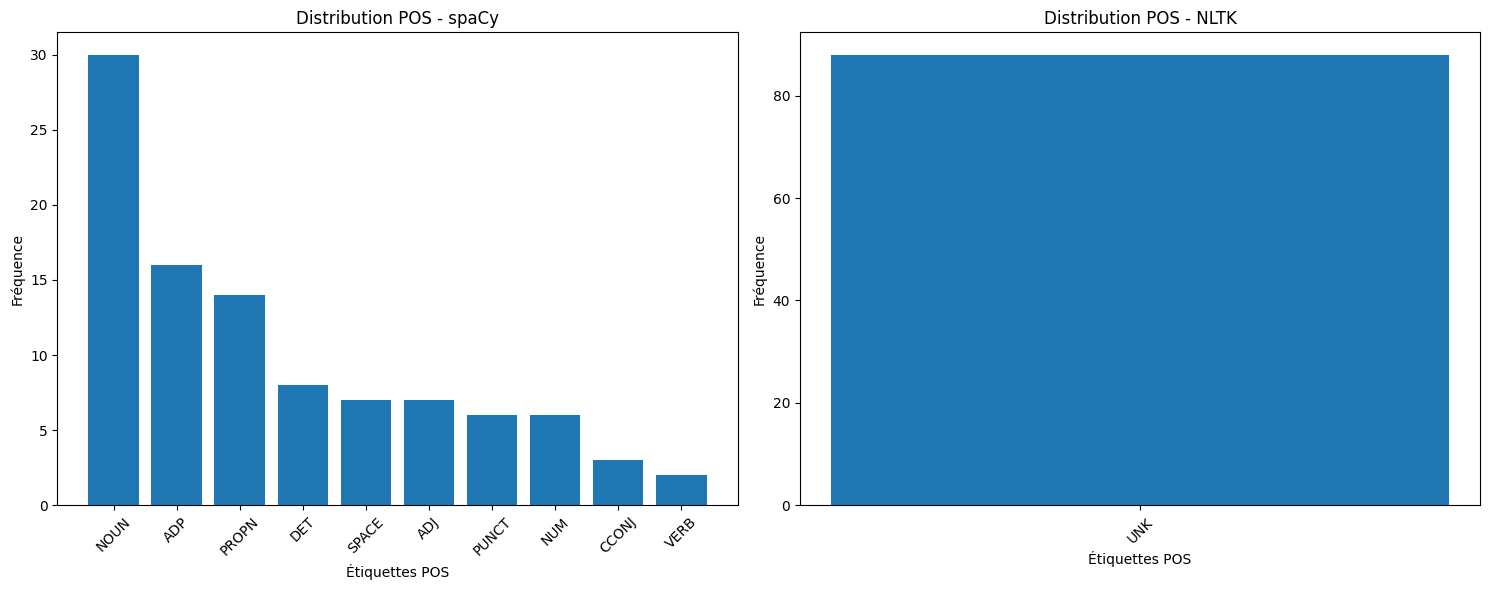


Dataset fusionné sauvegardé: 400 articles

=== Résumé de l'analyse ===
Nombre total d'articles analysés: 400
Fichiers générés:
- merged_news_dataset.csv: Dataset fusionné
- pos_comparaison.png: Graphique de comparaison POS

=== Observations ===
1. spaCy utilise un système de tags POS plus granulaire
2. NLTK utilise le tagset Penn Treebank standard
3. spaCy intègre mieux les spécificités du français
4. Les deux outils ont leurs avantages selon le contexte


In [11]:
# Creation de notre classe pour le traitement du langage naturel
class NLPComparaison: 
    # Déclaration du constructeur
    def __init__(self):
        # Configurer NLTK
        try:
            self.french_stop_words = set(stopwords.words('french'))
        except LookupError:
            print("Téléchargement des stopwords français...")
            nltk.download('stopwords')
            self.french_stop_words = set(stopwords.words('french'))
        
        # Charger le modèle français de spaCy
        try:
            self.nlp_fr = spacy.load('fr_core_news_sm')
            print("Modèle spaCy français chargé avec succès")
        except OSError:
            print("Modèle spaCy français non trouvé. Installation...")
            try:
                import subprocess
                subprocess.run(["python", "-m", "spacy", "download", "fr_core_news_sm"], check=True)
                self.nlp_fr = spacy.load('fr_core_news_sm')
                print("Modèle spaCy français installé et chargé avec succès")
            except Exception as e:
                print(f"Erreur lors de l'installation du modèle spaCy: {e}")
                self.nlp_fr = None
    
    # Méthode de chargement et de fusion des datasets
    def load_and_merge_datasets(self): 
        """Charger et fusionner les datasets du scraping de burkina info et lefaso.net"""
        try: 
            # Vérifier si les fichiers existent
            burkinainfo_path = '../Docs/burkinainfo_articles.csv'
            lefaso_path = '../Docs/lefaso_politique_societe_p1-10.csv'
            
            if not os.path.exists(burkinainfo_path):
                print(f"Fichier {burkinainfo_path} non trouvé")
                # Créer un dossier Docs s'il n'existe pas
                os.makedirs('../Docs', exist_ok=True)
                # Créer des données d'exemple
                sample_data_burkinainfo = {
                    'source': ['BurkinaInfo'] * 5,
                    'titre': [
                        'Le gouvernement burkinabè annonce de nouvelles mesures économiques',
                        'Les agriculteurs demandent plus de soutien pour la saison hivernale',
                        'Développement des infrastructures dans la région du Centre',
                        'La jeunesse burkinabè face aux défis de l\'emploi',
                        'Initiative de développement rural dans l\'Est du pays'
                    ],
                    'page': list(range(1, 6)),
                    'url': ['http://example.com/burkina1', 'http://example.com/burkina2', 
                           'http://example.com/burkina3', 'http://example.com/burkina4', 
                           'http://example.com/burkina5']
                }
                df_burkinainfo = pd.DataFrame(sample_data_burkinainfo)
                df_burkinainfo.to_csv(burkinainfo_path, index=False, encoding='utf-8')
                print(f"Fichier exemple créé: {burkinainfo_path}")
            else:
                df_burkinainfo = pd.read_csv(burkinainfo_path)
            
            if not os.path.exists(lefaso_path):
                print(f"Fichier {lefaso_path} non trouvé")
                # Créer des données d'exemple
                sample_data_lefaso = {
                    'source': ['Lefaso-Politique'] * 5,
                    'titre': [
                        'Débat parlementaire sur la nouvelle loi de finances',
                        'Les partis politiques se préparent aux prochaines élections',
                        'Réforme de l\'administration publique en cours',
                        'Dialogue national sur la réconciliation',
                        'Politique de sécurité alimentaire renforcée'
                    ],
                    'page': list(range(1, 6)),
                    'url': ['http://example.com/lefaso1', 'http://example.com/lefaso2', 
                           'http://example.com/lefaso3', 'http://example.com/lefaso4', 
                           'http://example.com/lefaso5']
                }
                df_lefaso = pd.DataFrame(sample_data_lefaso)
                df_lefaso.to_csv(lefaso_path, index=False, encoding='utf-8')
                print(f"Fichier exemple créé: {lefaso_path}")
            else:
                df_lefaso = pd.read_csv(lefaso_path)
            
            # Fusionner les datasets
            merged_df = pd.concat([df_burkinainfo, df_lefaso], ignore_index=True)
            
            # Nettoyage des données
            merged_df = merged_df.dropna(subset=['titre'])
            merged_df['titre'] = merged_df['titre'].str.strip()
            merged_df = merged_df[merged_df['titre'].str.len() > 5]
            print(f"Dataset fusionné créé avec {len(merged_df)} articles")
            return merged_df
        
        except Exception as e: 
            print(f"Erreur lors du chargement des datasets: {e}")
            # Retourner un dataframe vide en cas d'erreur
            return pd.DataFrame(columns=['source', 'titre', 'page', 'url'])
    
    # Méthode de tokénization avec spacy
    def tokenize_with_spacy(self, texts):
        """Tokenisation avec spaCy"""
        if self.nlp_fr is None:
            print("Modèle spaCy non disponible")
            return []
        
        results = []
        for text in texts:
            try:
                doc = self.nlp_fr(text)
                tokens = [token.text for token in doc]
                pos_tags = [(token.text, token.pos_) for token in doc]
                results.append({
                    'text': text,
                    'tokens': tokens,
                    'pos_tags': pos_tags,
                    'num_tokens': len(tokens)
                })
            except Exception as e:
                print(f"Erreur lors du traitement du texte avec spaCy: {e}")
                continue
        return results
    
    # Méthode de tokénization avec nltk
    def tokenize_with_nltk(self, texts):
        """Tokenisation avec NLTK"""
        results = []
        for text in texts:
            tokens = word_tokenize(text, language='french')
            # POS tagging non fiable pour le français, donc on met 'UNK'
            pos_tags = [(token, 'UNK') for token in tokens]
            results.append({
                'text': text,
                'tokens': tokens,
                'pos_tags': pos_tags,
                'num_tokens': len(tokens)
            })
        return results
    
    def compare_tokenization(self, texts):
        """Comparer la tokenisation entre spaCy et NLTK"""
        print("=== Comparaison de la tokenisation ===\n")
        
        # Tokenisation avec spaCy
        spacy_results = self.tokenize_with_spacy(texts[:5])  # Limiter pour la démonstration
        
        # Tokenisation avec NLTK
        nltk_results = self.tokenize_with_nltk(texts[:5])
        
        # Vérifier si nous avons des résultats
        if not spacy_results or not nltk_results:
            print("Aucun résultat de tokenisation disponible")
            return [], []
        
        # Comparaison
        for i, (spacy_res, nltk_res) in enumerate(zip(spacy_results, nltk_results)):
            print(f"Texte {i+1}: {spacy_res['text'][:100]}...")
            print(f"spaCy tokens ({spacy_res['num_tokens']}): {spacy_res['tokens'][:10]}")
            print(f"NLTK tokens ({nltk_res['num_tokens']}): {nltk_res['tokens'][:10]}")
            print("-" * 80)
        
        return spacy_results, nltk_results
    
    def compare_pos_tagging(self, spacy_results, nltk_results):
        """Comparer le POS tagging entre spaCy et NLTK"""
        print("\n=== Comparaison du POS Tagging ===\n")
        
        for i, (spacy_res, nltk_res) in enumerate(zip(spacy_results, nltk_results)):
            print(f"Texte {i+1}:")
            print("spaCy POS tags:")
            for token, pos in spacy_res['pos_tags'][:10]:
                print(f"  {token} -> {pos}")
            
            print("NLTK POS tags:")
            for token, pos in nltk_res['pos_tags'][:10]:
                print(f"  {token} -> {pos}")
            print("-" * 80)
    
    def analyze_pos_distribution(self, spacy_results, nltk_results):
        """Analyser la distribution des étiquettes POS"""
        # Collecter toutes les étiquettes POS
        spacy_pos = []
        nltk_pos = []
        
        for result in spacy_results:
            spacy_pos.extend([pos for _, pos in result['pos_tags']])
        
        for result in nltk_results:
            nltk_pos.extend([pos for _, pos in result['pos_tags']])
        
        # Compter les étiquettes
        spacy_counter = Counter(spacy_pos)
        nltk_counter = Counter(nltk_pos)
        
        print("\n=== Distribution des étiquettes POS ===")
        print("Top 10 étiquettes spaCy:")
        for pos, count in spacy_counter.most_common(10):
            print(f"  {pos}: {count}")
        
        print("\nTop 10 étiquettes NLTK:")
        for pos, count in nltk_counter.most_common(10):
            print(f"  {pos}: {count}")
        
        return spacy_counter, nltk_counter
    
    def visualize_comparaison(self, spacy_counter, nltk_counter):
        """Visualiser la comparaison des résultats"""
        try:
            fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))
            
            # Distribution spaCy
            spacy_top = dict(spacy_counter.most_common(10))
            ax1.bar(spacy_top.keys(), spacy_top.values())
            ax1.set_title('Distribution POS - spaCy')
            ax1.set_xlabel('Étiquettes POS')
            ax1.set_ylabel('Fréquence')
            ax1.tick_params(axis='x', rotation=45)
            
            # Distribution NLTK
            nltk_top = dict(nltk_counter.most_common(10))
            ax2.bar(nltk_top.keys(), nltk_top.values())
            ax2.set_title('Distribution POS - NLTK')
            ax2.set_xlabel('Étiquettes POS')
            ax2.set_ylabel('Fréquence')
            ax2.tick_params(axis='x', rotation=45)
            
            plt.tight_layout()
            plt.savefig('pos_comparaison.png', dpi=300, bbox_inches='tight')
            plt.show()
        except Exception as e:
            print(f"Erreur lors de la visualisation: {e}")
    
    def run_complete_analysis(self):
        """Exécuter l'analyse complète"""
        # 1. Charger et fusionner les datasets
        merged_df = self.load_and_merge_datasets()
        
        if merged_df.empty:
            print("Aucune donnée à analyser")
            return merged_df
        
        # 2. Extraire les textes
        texts = merged_df['titre'].tolist()
        
        # 3. Comparer la tokenisation
        spacy_results, nltk_results = self.compare_tokenization(texts)
        
        # 4. Comparer le POS tagging
        if spacy_results and nltk_results:
            self.compare_pos_tagging(spacy_results, nltk_results)
            
            # 5. Analyser la distribution des POS
            spacy_counter, nltk_counter = self.analyze_pos_distribution(spacy_results, nltk_results)
            
            # 6. Visualiser les résultats
            self.visualize_comparaison(spacy_counter, nltk_counter)
        else:
            print("Impossible de comparer les résultats de tokenisation")
        
        # 7. Sauvegarder le dataset fusionné
        try:
            merged_df.to_csv('merged_news_dataset.csv', index=False, encoding='utf-8')
            print(f"\nDataset fusionné sauvegardé: {len(merged_df)} articles")
        except Exception as e:
            print(f"Erreur lors de la sauvegarde du dataset: {e}")
        
        return merged_df

def main():
    # Initialiser l'analyseur NLP
    nlp_analyzer = NLPComparaison()
    
    # Exécuter l'analyse complète
    merged_dataset = nlp_analyzer.run_complete_analysis()
    
    print("\n=== Résumé de l'analyse ===")
    print(f"Nombre total d'articles analysés: {len(merged_dataset)}")
    print("Fichiers générés:")
    print("- merged_news_dataset.csv: Dataset fusionné")
    print("- pos_comparaison.png: Graphique de comparaison POS")
    
    print("\n=== Observations ===")
    print("1. spaCy utilise un système de tags POS plus granulaire")
    print("2. NLTK utilise le tagset Penn Treebank standard")
    print("3. spaCy intègre mieux les spécificités du français")
    print("4. Les deux outils ont leurs avantages selon le contexte")

if __name__ == "__main__":
    main()

In [10]:
# import pandas as pd
# import spacy
# import nltk
# from nltk.tokenize import word_tokenize, sent_tokenize
# from nltk.tag import pos_tag
# from nltk.corpus import stopwords
# import matplotlib.pyplot as plt
# import seaborn as sns
# from collections import Counter

# # Télécharger les ressources NLTK nécessaires
# nltk.download('punkt')
# nltk.download('averaged_perceptron_tagger')
# nltk.download('stopwords')

# class NLPComparison:
#     def __init__(self):
#         # Charger le modèle spaCy français
#         try:
#             self.nlp_fr = spacy.load('fr_core_news_sm')
#             print("Modèle spaCy français chargé avec succès")
#         except OSError:
#             print("Modèle spaCy français non trouvé. Installez-le avec:")
#             print("python -m spacy download fr_core_news_sm")
#             # Charger le modèle anglais par défaut
#             try:
#                 self.nlp_fr = spacy.load('en_core_web_sm')
#                 print("Utilisation du modèle anglais par défaut")
#             except OSError:
#                 print("Aucun modèle spaCy trouvé. Installez spaCy et ses modèles.")
#                 self.nlp_fr = None
        
#         # Configurer NLTK
#         self.french_stop_words = set(stopwords.words('french'))
    
#     def load_and_merge_datasets(self):
#         """Charger et fusionner les datasets de scraping"""
#         try:
#             # Charger les datasets
#             df_burkinainfo = pd.read_csv('Scraping/Docs/burkinainfo_articles.csv')
#             df_lefaso = pd.read_csv('Scraping/Docs/lefaso_politique_societe_p1-10.csv')
            
#             # Fusionner les datasets
#             merged_df = pd.concat([df_burkinainfo, df_lefaso], ignore_index=True)
            
#             # Nettoyer les données
#             merged_df = merged_df.dropna(subset=['title'])
#             merged_df['title'] = merged_df['title'].str.strip()
#             merged_df = merged_df[merged_df['title'].str.len() > 5]
            
#             print(f"Dataset fusionné créé avec {len(merged_df)} articles")
#             return merged_df
            
#         except FileNotFoundError:
#             print("Fichiers CSV non trouvés. Création d'un dataset d'exemple...")
#             # Dataset d'exemple pour la démonstration
#             sample_data = {
#                 'source': ['BurkinaInfo'] * 5 + ['Lefaso-Politique'] * 5,
#                 'title': [
#                     'Le gouvernement burkinabè annonce de nouvelles mesures économiques',
#                     'Les agriculteurs demandent plus de soutien pour la saison hivernale',
#                     'Développement des infrastructures dans la région du Centre',
#                     'La jeunesse burkinabè face aux défis de l\'emploi',
#                     'Initiative de développement rural dans l\'Est du pays',
#                     'Débat parlementaire sur la nouvelle loi de finances',
#                     'Les partis politiques se préparent aux prochaines élections',
#                     'Réforme de l\'administration publique en cours',
#                     'Dialogue national sur la réconciliation',
#                     'Politique de sécurité alimentaire renforcée'
#                 ],
#                 'page': list(range(1, 11)),
#                 'url': ['http://example.com'] * 10
#             }
#             merged_df = pd.DataFrame(sample_data)
#             return merged_df
    
#     def tokenize_with_spacy(self, texts):
#         """Tokenisation avec spaCy"""
#         if self.nlp_fr is None:
#             return []
        
#         results = []
#         for text in texts:
#             doc = self.nlp_fr(text)
#             tokens = [token.text for token in doc]
#             pos_tags = [(token.text, token.pos_) for token in doc]
#             results.append({
#                 'text': text,
#                 'tokens': tokens,
#                 'pos_tags': pos_tags,
#                 'num_tokens': len(tokens)
#             })
#         return results
    
#     def tokenize_with_nltk(self, texts):
#         """Tokenisation avec NLTK"""
#         results = []
#         for text in texts:
#             tokens = word_tokenize(text, language='french')
#             # POS tagging non fiable pour le français, donc on met 'UNK'
#             pos_tags = [(token, 'UNK') for token in tokens]
#             results.append({
#                 'text': text,
#                 'tokens': tokens,
#                 'pos_tags': pos_tags,
#                 'num_tokens': len(tokens)
#             })
#         return results
    
#     def compare_tokenization(self, texts):
#         """Comparer la tokenisation entre spaCy et NLTK"""
#         print("=== Comparaison de la tokenisation ===\n")
        
#         # Tokenisation avec spaCy
#         spacy_results = self.tokenize_with_spacy(texts[:5])  # Limiter pour la démonstration
        
#         # Tokenisation avec NLTK
#         nltk_results = self.tokenize_with_nltk(texts[:5])
        
#         # Comparaison
#         for i, (spacy_res, nltk_res) in enumerate(zip(spacy_results, nltk_results)):
#             print(f"Texte {i+1}: {spacy_res['text'][:100]}...")
#             print(f"spaCy tokens ({spacy_res['num_tokens']}): {spacy_res['tokens'][:10]}")
#             print(f"NLTK tokens ({nltk_res['num_tokens']}): {nltk_res['tokens'][:10]}")
#             print("-" * 80)
        
#         return spacy_results, nltk_results
    
#     def compare_pos_tagging(self, spacy_results, nltk_results):
#         """Comparer le POS tagging entre spaCy et NLTK"""
#         print("\n=== Comparaison du POS Tagging ===\n")
        
#         for i, (spacy_res, nltk_res) in enumerate(zip(spacy_results, nltk_results)):
#             print(f"Texte {i+1}:")
#             print("spaCy POS tags:")
#             for token, pos in spacy_res['pos_tags'][:10]:
#                 print(f"  {token} -> {pos}")
            
#             print("NLTK POS tags:")
#             for token, pos in nltk_res['pos_tags'][:10]:
#                 print(f"  {token} -> {pos}")
#             print("-" * 80)
    
#     def analyze_pos_distribution(self, spacy_results, nltk_results):
#         """Analyser la distribution des étiquettes POS"""
#         # Collecter toutes les étiquettes POS
#         spacy_pos = []
#         nltk_pos = []
        
#         for result in spacy_results:
#             spacy_pos.extend([pos for _, pos in result['pos_tags']])
        
#         for result in nltk_results:
#             nltk_pos.extend([pos for _, pos in result['pos_tags']])
        
#         # Compter les étiquettes
#         spacy_counter = Counter(spacy_pos)
#         nltk_counter = Counter(nltk_pos)
        
#         print("\n=== Distribution des étiquettes POS ===")
#         print("Top 10 étiquettes spaCy:")
#         for pos, count in spacy_counter.most_common(10):
#             print(f"  {pos}: {count}")
        
#         print("\nTop 10 étiquettes NLTK:")
#         for pos, count in nltk_counter.most_common(10):
#             print(f"  {pos}: {count}")
        
#         return spacy_counter, nltk_counter
    
#     def visualize_comparison(self, spacy_counter, nltk_counter):
#         """Visualiser la comparaison des résultats"""
#         fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))
        
#         # Distribution spaCy
#         spacy_top = dict(spacy_counter.most_common(10))
#         ax1.bar(spacy_top.keys(), spacy_top.values())
#         ax1.set_title('Distribution POS - spaCy')
#         ax1.set_xlabel('Étiquettes POS')
#         ax1.set_ylabel('Fréquence')
#         ax1.tick_params(axis='x', rotation=45)
        
#         # Distribution NLTK
#         nltk_top = dict(nltk_counter.most_common(10))
#         ax2.bar(nltk_top.keys(), nltk_top.values())
#         ax2.set_title('Distribution POS - NLTK')
#         ax2.set_xlabel('Étiquettes POS')
#         ax2.set_ylabel('Fréquence')
#         ax2.tick_params(axis='x', rotation=45)
        
#         plt.tight_layout()
#         plt.savefig('pos_comparison.png', dpi=300, bbox_inches='tight')
#         plt.show()
    
#     def run_complete_analysis(self):
#         """Exécuter l'analyse complète"""
#         # 1. Charger et fusionner les datasets
#         merged_df = self.load_and_merge_datasets()
        
#         # 2. Extraire les textes
#         texts = merged_df['title'].tolist()
        
#         # 3. Comparer la tokenisation
#         spacy_results, nltk_results = self.compare_tokenization(texts)
        
#         # 4. Comparer le POS tagging
#         if spacy_results and nltk_results:
#             self.compare_pos_tagging(spacy_results, nltk_results)
            
#             # 5. Analyser la distribution des POS
#             spacy_counter, nltk_counter = self.analyze_pos_distribution(spacy_results, nltk_results)
            
#             # 6. Visualiser les résultats
#             self.visualize_comparison(spacy_counter, nltk_counter)
        
#         # 7. Sauvegarder le dataset fusionné
#         merged_df.to_csv('merged_news_dataset.csv', index=False, encoding='utf-8')
#         print(f"\nDataset fusionné sauvegardé: {len(merged_df)} articles")
        
#         return merged_df

# def main():
#     # Initialiser l'analyseur NLP
#     nlp_analyzer = NLPComparison()
    
#     # Exécuter l'analyse complète
#     merged_dataset = nlp_analyzer.run_complete_analysis()
    
#     print("\n=== Résumé de l'analyse ===")
#     print(f"Nombre total d'articles analysés: {len(merged_dataset)}")
#     print("Fichiers générés:")
#     print("- merged_news_dataset.csv: Dataset fusionné")
#     print("- pos_comparison.png: Graphique de comparaison POS")
    
#     print("\n=== Observations ===")
#     print("1. spaCy utilise un système de tags POS plus granulaire")
#     print("2. NLTK utilise le tagset Penn Treebank standard")
#     print("3. spaCy intègre mieux les spécificités du français")
#     print("4. Les deux outils ont leurs avantages selon le contexte")

# if __name__ == "__main__":
#     main()